In [45]:
import time

import matplotlib as mp
import matplotlib.pyplot as plt

import pandas as pd

import duckdb

import sklearn as sk

import seaborn as sns
import plotly.express as px
#import streamlit

# Data Connection

## Connecting to duckdb and creating a table

In [12]:
conn = duckdb.connect()

query = """
CREATE TABLE heart_disease AS
SELECT 
    column00 AS age,
    column01 AS sex,
    column02 AS cp,
    column03 AS trestbps,
    column04 AS chol,
    column05 AS fbs,
    column06 AS restecg,
    column07 AS thalach,
    column08 AS exang,
    column09 AS oldpeak,
    column10 AS slope,
    column11 AS ca,
    column12 AS thal,
    column13 AS num
FROM read_csv_auto('/Users/oliviaoliveira/Documents/PhD_PDCDS/projects/heart-disease/data-repositories/heart-disease/processed.cleveland.data');
"""

conn.execute(query)

start_time = time.time()


## Selecting the table as a dataframe

In [14]:
query = """
select * 
from heart_disease;
"""

In [15]:
df = conn.sql(query).df()

In [22]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [23]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
'''
Attribute documentation:
1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
'''

# EDA: Exploratory Data Analysis

In [ ]:
'''
Reqs:
- grouping of data
- filtering data
- counting data
- 3 different graphical methods (boxplot + heatmap + count plot)
- show standard deviation or quarter or IQR of columns at some point
- a linear or logistic model >>> in the case of this dataset, we have a categorical predictor ('num')
, diagnosis of heart disease, which lead us to a Logistic Regression Model
'''

### Statistical summary of the dataset

In [42]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


### Data quality check: Has missing values?

In [43]:
null_values = df.isnull().any()
null_values

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

> *NO NULLs* :: ready-for logistic regression modelling

## Cohort description

### How many patients do we have MALE and FEMALE?

In [ ]:
# 0 - Male
# 1 - Female

In [107]:
query_sex = '''
select 
    sex
    , count(*) as count
from heart_disease
group by sex;
'''

In [108]:
df_sex = conn.sql(query_sex).df()

In [109]:
df_sex['sex'] = df_sex['sex'].replace([0, 1], ['Male', 'Female'])
df_sex

,sex,count
0,Female,206
1,Male,97


In [111]:
fig_sex = px.bar(df_sex, x='sex', y='count', 
                  title="Cohort distribution by sex",
                text_auto=True)
fig_sex.show()

In [112]:
percentual = df['sex'].value_counts(normalize = True)*100
percentual

1.0    67.986799
0.0    32.013201
Name: sex, dtype: float64

In [ ]:
# Compare chest pain type (cp) by num to see which type correlates most with heart disease.

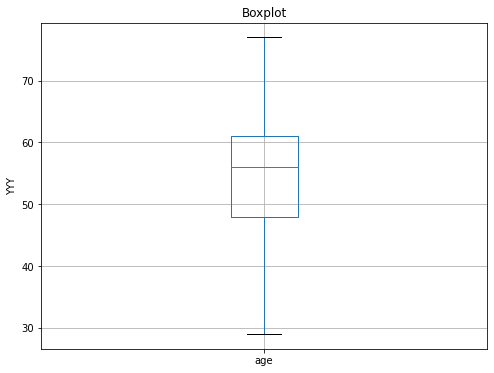

In [97]:
plt.figure(figsize=(8, 6))
df.boxplot(column=['age'])

plt.title('Boxplot')
plt.ylabel('YYY')
plt.show()

In [94]:
corr = df['sex']. corr(df['cp'])
corr

0.010083888226349874

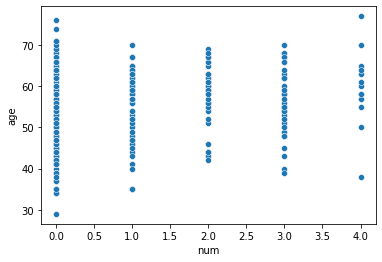

In [96]:
sns.scatterplot(x="num", y="age", data=df);